# Trabalho 3 - Operações Morfológicas

## Segmentação utilizando top-hat

### Preâmbulo

Em morfologia matemática e processamento digital de imagens a transformação top-hat é uma operação que extrai pequenos elementos e detalhes de uma imagem.

Existem dois tipos de transformação top-hat, são elas, white ($T_w$) e black ($T_b$).
Estas podem ser definidas da seguinte forma:

$$
T_w(f) = f - f \circ B
$$

$$
T_b(f) = f - f \bullet B
$$
Onde:
* $f: E \rightarrow R$ representa a função de uma imagem em tons de cinza;
* B é o elemento estruturante utilizado;
* $\circ$ denota a operação de abertura;
* * $f \circ B = (f \ominus \tilde{B}) \oplus B $
* * $f \circ B = (f \mbox{ ero } B) \mbox{  dil } \tilde{B} $
* $\bullet$ denota a operação de fechamento;
* * $f \circ B = (f \oplus \tilde{B}) \ominus B $
* * $f \circ B = (f \mbox{ dil } B) \mbox{  ero } \tilde{B} $

### Código

O código, apresentado a seguir, é separado nos métodos:
* show_image apenas para exibir a imagem na tela;
* strel cria um elemento estruturante circular;
* abe operação de abertura;
* fec operação de fechamento;
* tophat_white transformação top-hat white;
* tophat_black transformação top-hat black;

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.seterr(all='raise')


def strel(radius):
	'''
	Cria um elemento estruturante em forma de círculo.
	:param radius: Raio do elemento estruturante.
	:return: O elemento estruturante.
	'''
	resp = np.zeros([2 * radius + 1, 2 * radius + 1], np.uint8)
	for i in range(2 * radius + 1):
		for j in range(2 * radius + 1):
			x = i - radius
			y = j - radius
			resp[i, j] = x * x + y * y <= radius * radius
	return resp


def show_image(img, title=None):
	if isinstance(img, list) and len(img) > 0:
		if isinstance(img[0], list) and len(img[0]) > 0:
			f, axarr = plt.subplots(len(img), len(img[0]), figsize=(16, 10))
			if title:
				f.suptitle(title, fontsize="x-large")
			for i in range(len(img)):
				for j in range(len(img[i])):
					axarr[i, j].imshow(img[i][j], cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
		else:
			f, axarr = plt.subplots(1, len(img), figsize=(20, 10))
			if title:
				f.suptitle(title, fontsize="x-large")
			for i in range(len(img)):
				axarr[i].imshow(img[i], cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
	else:
		if title:
			plt.title(title)
		plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
	plt.show()


def abe(img, neigh):
	return cv2.dilate(cv2.erode(img, neigh, iterations=1), neigh.transpose(), iterations=1)


def fec(img, neigh):
	return cv2.erode(cv2.dilate(img, neigh, iterations=1), neigh.transpose(), iterations=1)


def tophat_white(img, neigh):
	return img - abe(img, neigh)


def tophat_black(img, neigh):
	return img - fec(img, neigh)


file_name = "Cosmos_original.jpg"
cosmos_img = cv2.imread(file_name, 0)


### Resultados

Para os testes foi utilizada a foto do exemplo referenciado:
https://en.wikipedia.org/wiki/Top-hat_transform#Example

#### Disco

Conforme podemos ver abaixo, o filtro top-hat black identifica os círculos brancos contudo gera inúmeros pontos brancos na imagem final.

Top-hat Black - Imagem original com variações no raio de um disco como elementro estruturante, de 1, 3 e 5.

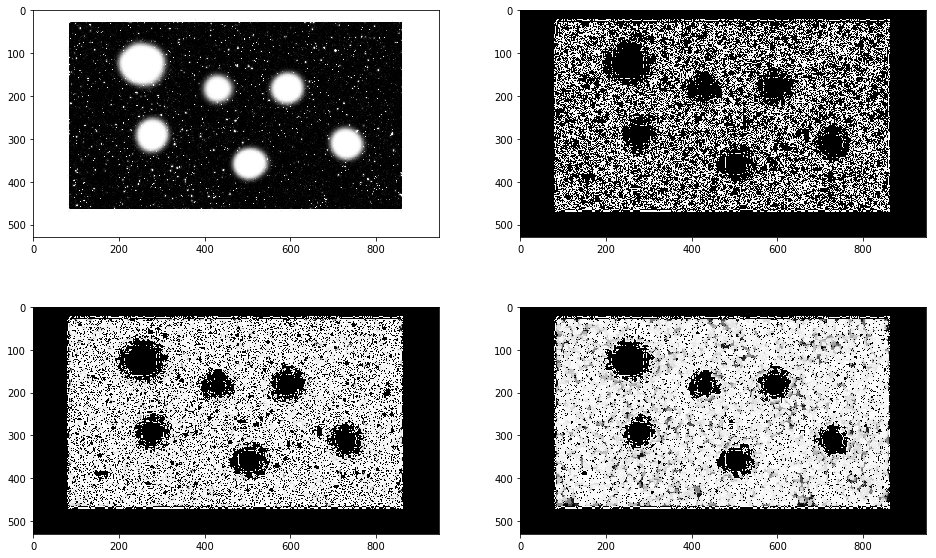

In [2]:
show_image([[cosmos_img, tophat_black(cosmos_img, strel(1))],
	[tophat_black(cosmos_img, strel(3)), tophat_black(cosmos_img, strel(5))]])

Conforme pode ser visto abaixo, o filtro top-hat white identifica os círculos brancos sem gerar os pontos brancos na imagem e a medida que o elemento estruturante aumenta de tamanho a imagem final parece apresentar menos efeitos colaterais.

Top-hat White - Imagem original com variações no raio de um disco como elementro estruturante, de 1, 3 e 5.

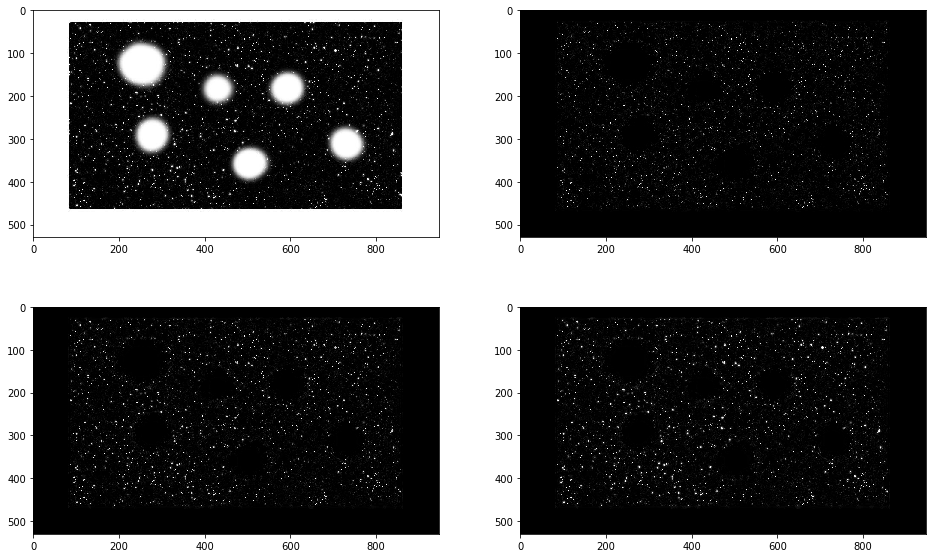

In [3]:
show_image([[cosmos_img, tophat_white(cosmos_img, strel(1))],
	[tophat_white(cosmos_img, strel(3)), tophat_white(cosmos_img, strel(5))]])

#### Quadrado

Ao utilizar um elemento estruturante quadrado de largura 1 a imagem final perde os círculos e também os pontos brancos tanto para o filtro top-hat black como para o white.
No filtro top-hat black, utilizando-se um filtro de tamanho 3 e 5, observamos o mesmo problema do surimento de pontos brancos.

Top-hat Black - Imagem original com variações na largura de um quadrado como elementro estruturante, de 1, 3 e 5.

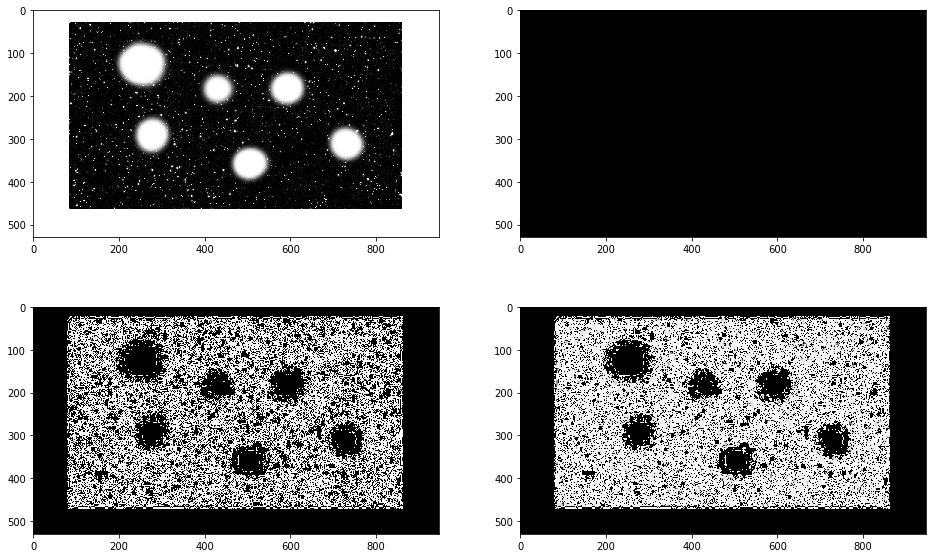

In [4]:
show_image([[cosmos_img, tophat_black(cosmos_img, np.ones((1, 1), np.uint8))],
	[tophat_black(cosmos_img, np.ones((3, 3), np.uint8)), tophat_black(cosmos_img, np.ones((5, 5), np.uint8))]])

Top-hat White - Imagem original com variações na largura de um quadrado como elementro estruturante, de 1, 3 e 5.

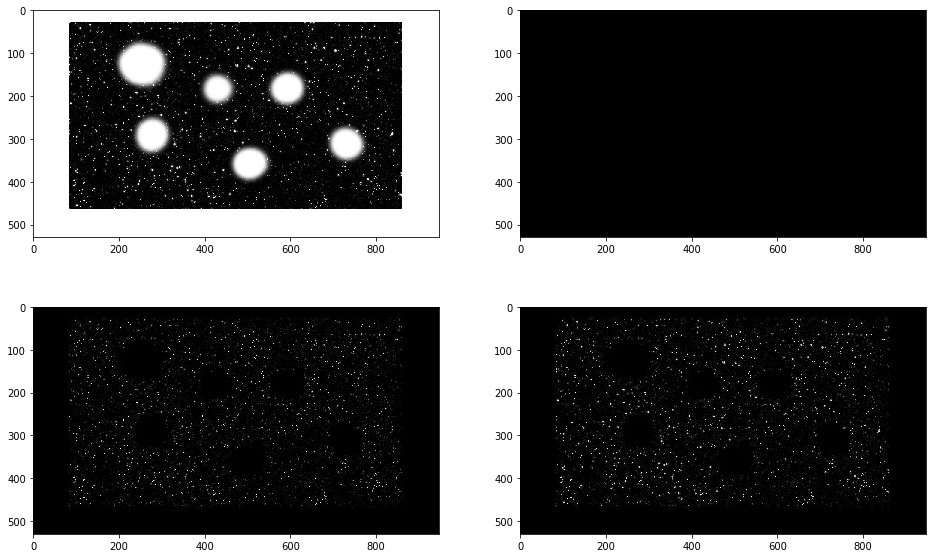

In [5]:
show_image([[cosmos_img, tophat_white(cosmos_img, np.ones((1, 1), np.uint8))],
	[tophat_white(cosmos_img, np.ones((3, 3), np.uint8)), tophat_white(cosmos_img, np.ones((5, 5), np.uint8))]])

### Discussão

Ao comparar os resultados pode-se perceber que os filtros top-hat white detectam melhor os círculos e sem gerar como efeito colateral os pontos brancos.

Também pode-se notar que, exceto para o elemento estruturante quadrado de tamanho 1, o resultado encontrado para os elementos estruturantes circulares e quadrados do filtro top-hat white tiveram bons resultados e bastante próximos.